In [13]:
# Curso de CFD de Lorena Barba.
# https://github.com/barbagroup/CFDPython

import numpy as np
import matplotlib.pyplot as plt
import time, sys

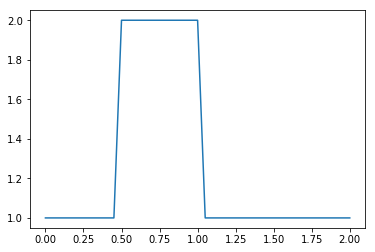

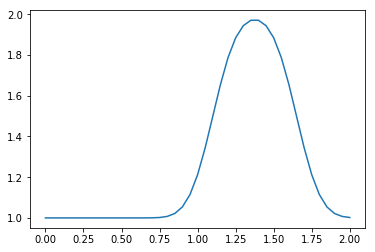

In [14]:
# Step 1

nx = 41
dx = 2 / (nx - 1)
nt = 25
dt = .025
c = 1

u = np.ones(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2

plt.plot(np.linspace(0,2,nx),u)
plt.show()

un = np.ones(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    
plt.plot(np.linspace(0,2,nx),u)
plt.show()

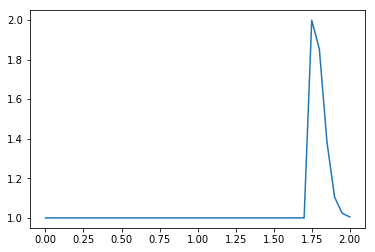

In [15]:
# Step 2

nx = 41
dx = 2 / (nx - 1)
nt = 25
dt = .025
c = 1

u = np.ones(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2

un = np.ones(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    
plt.plot(np.linspace(0,2,nx),u)
plt.show()

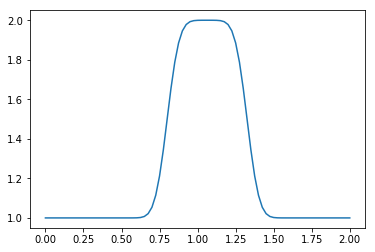

In [16]:
# CFL Condition

def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 25
    c = 1
    sigma = .5
    
    dt = sigma * dx

    u = np.ones(nx)
    u[int(.5 / dx):int(1 / dx + 1)] = 2

    un = np.ones(nx)

    for n in range(nt):
        un = u.copy()
        for i in range(1,nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    
    plt.plot(np.linspace(0,2,nx),u)
    plt.show()
    
linearconv(81)

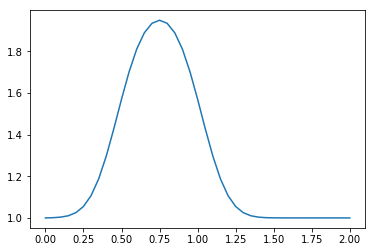

In [17]:
# Step 3

nx = 41
dx = 2 / (nx - 1)
nt = 20
nu = 0.3
sigma = .2
dt = sigma * dx**2 / nu

u = np.ones(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2

un = np.ones(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    
plt.plot(np.linspace(0,2,nx),u)
plt.show()

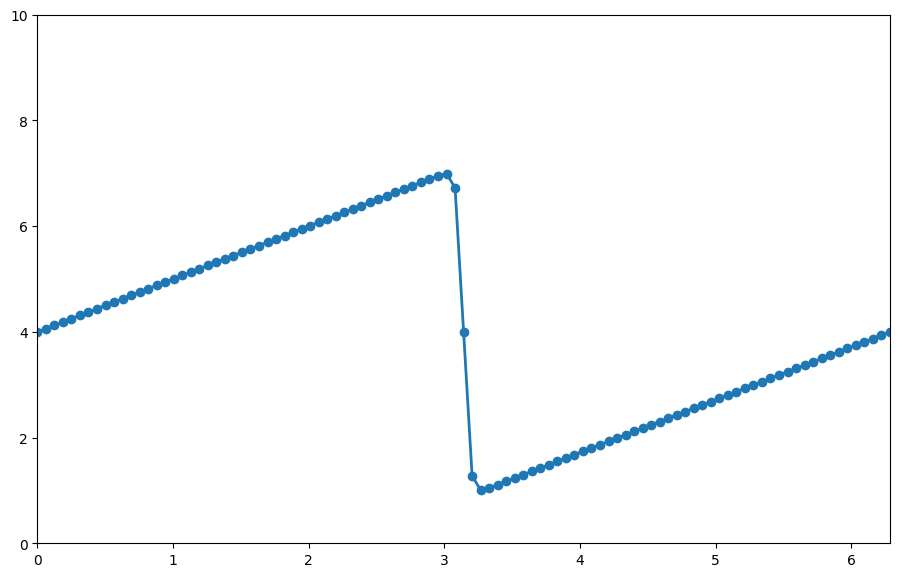

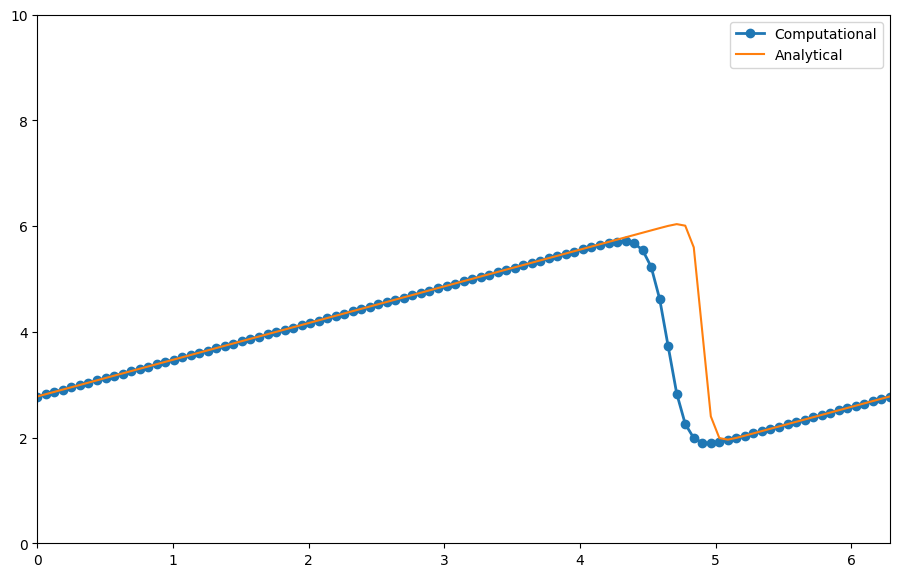

In [18]:
# Step 4

import sympy
from sympy import init_printing
from sympy.utilities.lambdify import lambdify


init_printing(use_latex=True)

x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * np.pi)**2 / (4 * nu * (t + 1))))


phiprime = phi.diff(x)

u = -2 * nu * (phiprime / phi) + 4

ufunc = lambdify((t, x, nu), u)

nx = 101
nt = 100
dx = 2 * np.pi / (nx - 1)
nu = .07
dt = dx * nu

x = np.linspace(0, 2 * np.pi, nx)
un = np.empty(nx)
t = 0

u = np.asarray([ufunc(t, x0, nu) for x0 in x])

plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10]);
plt.show()

for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])

plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x,u, marker='o', lw=2, label='Computational')
plt.plot(x, u_analytical, label='Analytical')
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])
plt.legend();
plt.show()

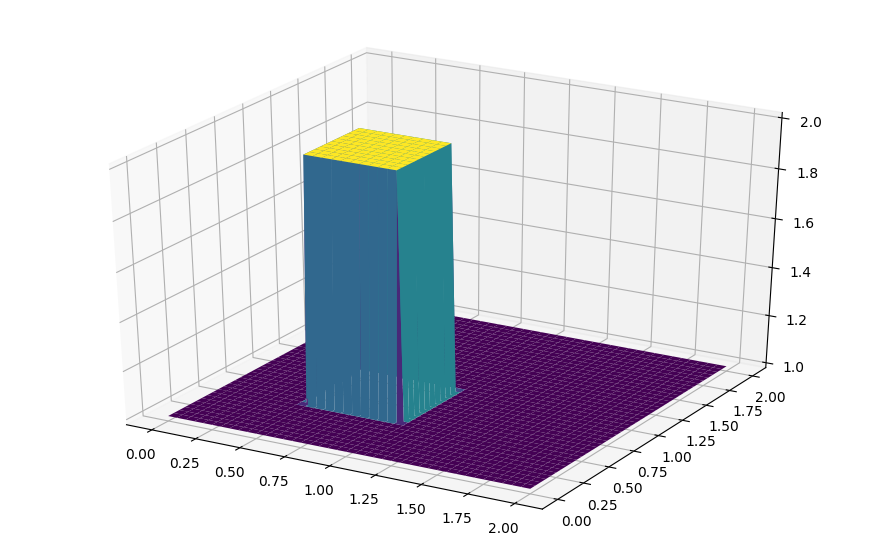

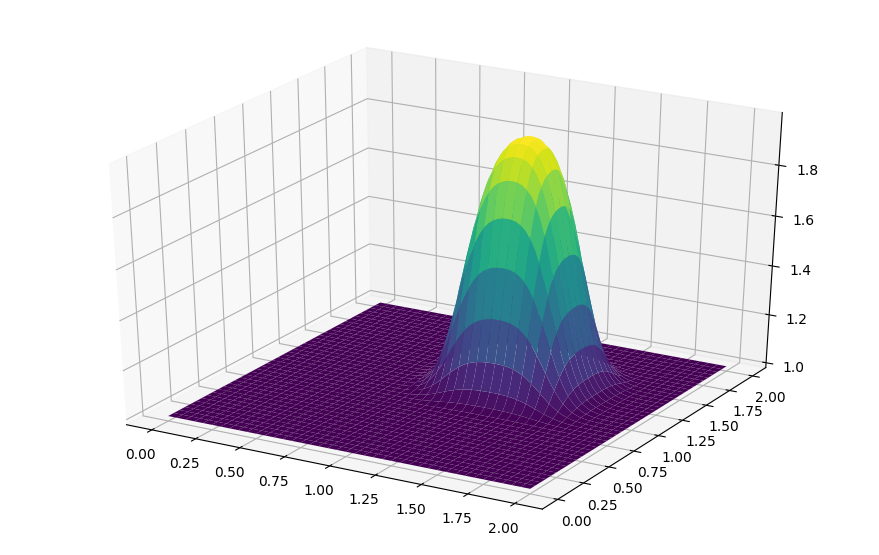

In [19]:
# Step 5

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx))
un = np.ones((ny,nx))

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X, Y, u[:],cmap = cm.viridis)
plt.show()

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)
plt.show()

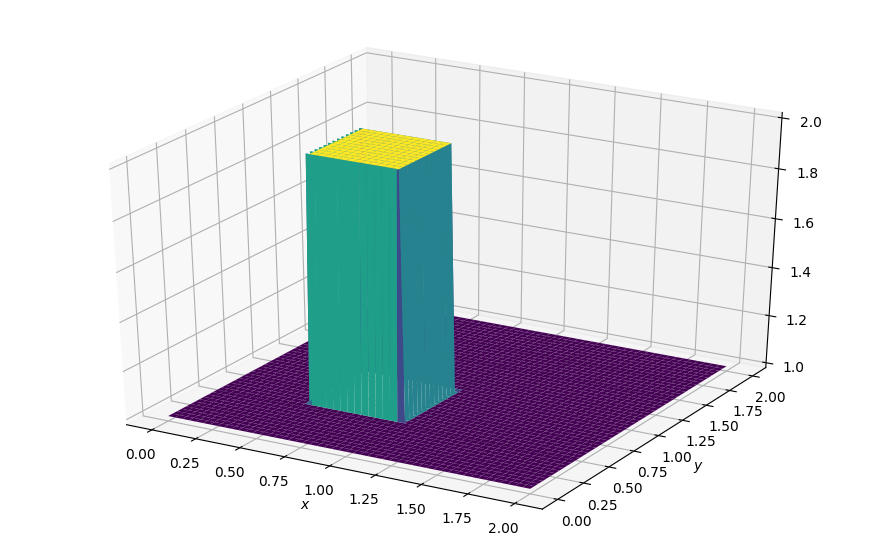

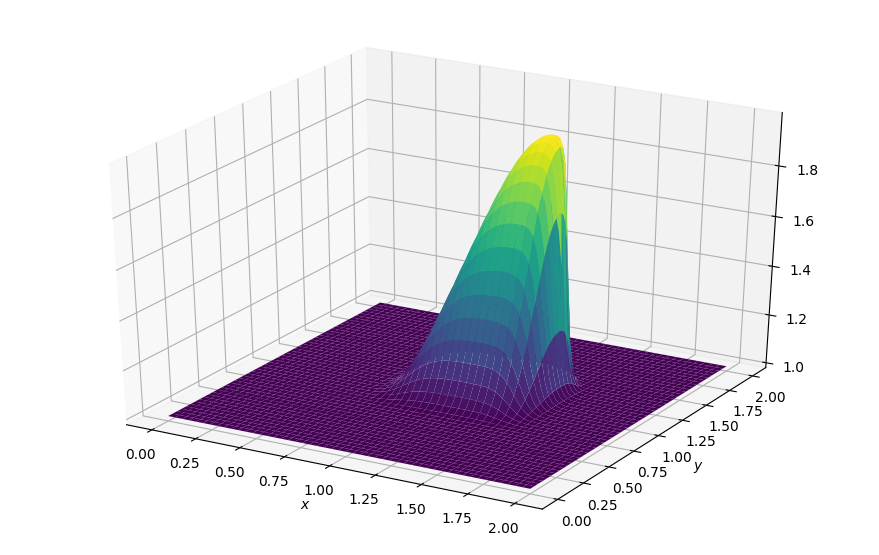

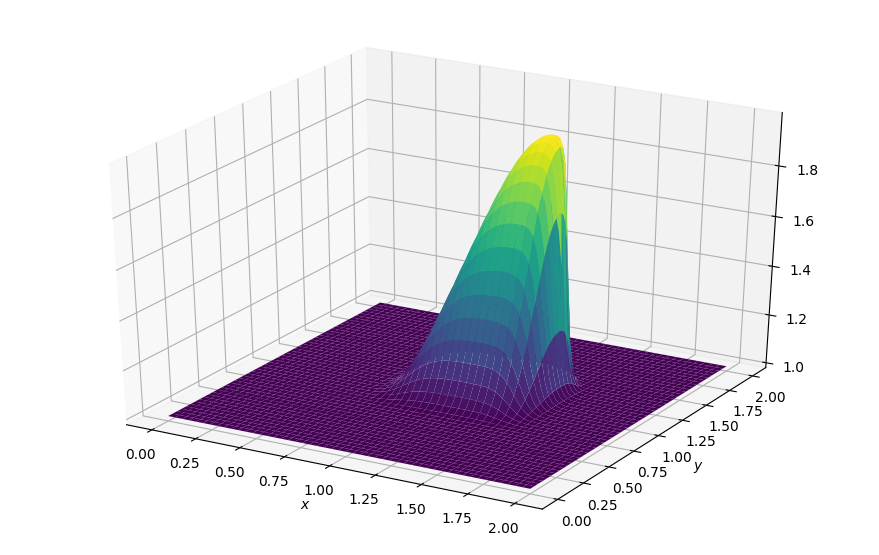

In [20]:
# Step 6

nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx))
v = np.ones((ny,nx))
un = np.ones((ny,nx))
vn = np.ones((ny,nx))

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 


fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X, Y, u[:],cmap = cm.viridis, rstride=2, cstride=2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$');
plt.show()

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - 
                 (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                  vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] -
                 (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');
plt.show()

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');
plt.show()

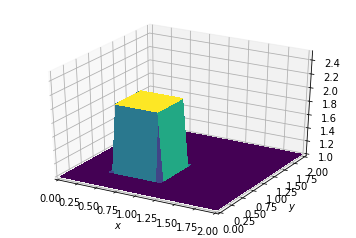

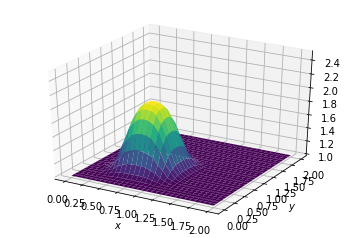

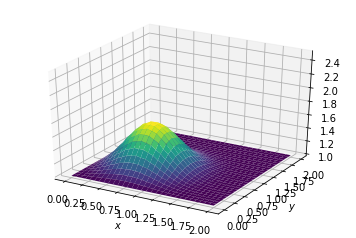

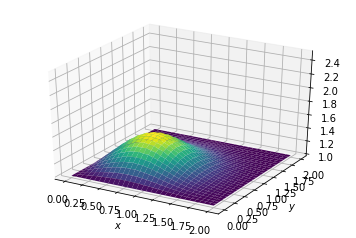

In [21]:
# Step 7

nx = 31
ny = 31
nt = 17
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
un = np.ones((ny, nx))

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');
plt.show()

def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
    
    for n in range(nt + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1

    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');
    plt.show()
    
diffuse(5)
diffuse(25)
diffuse(50)